
# Licence

## Car binary classification

Copyright (C) 2021 Juan Luis Ruiz Vanegas (juanluisruiz971@comunidad.unam.mx)

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program. If not, see https://www.gnu.org/licenses/.


## Exploratory Data Analisys

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

import numpy as np

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin,class_mpg,is_able
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,1.027638,0.133166
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,0.873189,0.340182
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,1.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,2.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,3.000000,1.000000


In [4]:
data.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,class_mpg,is_able
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
 9   class_mpg     398 non-null    int64  
 10  is_able       398 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 34.3+ KB


No missing data. 
 
*horsepower* and *car_name* are type object. It's a good idea change text to number.

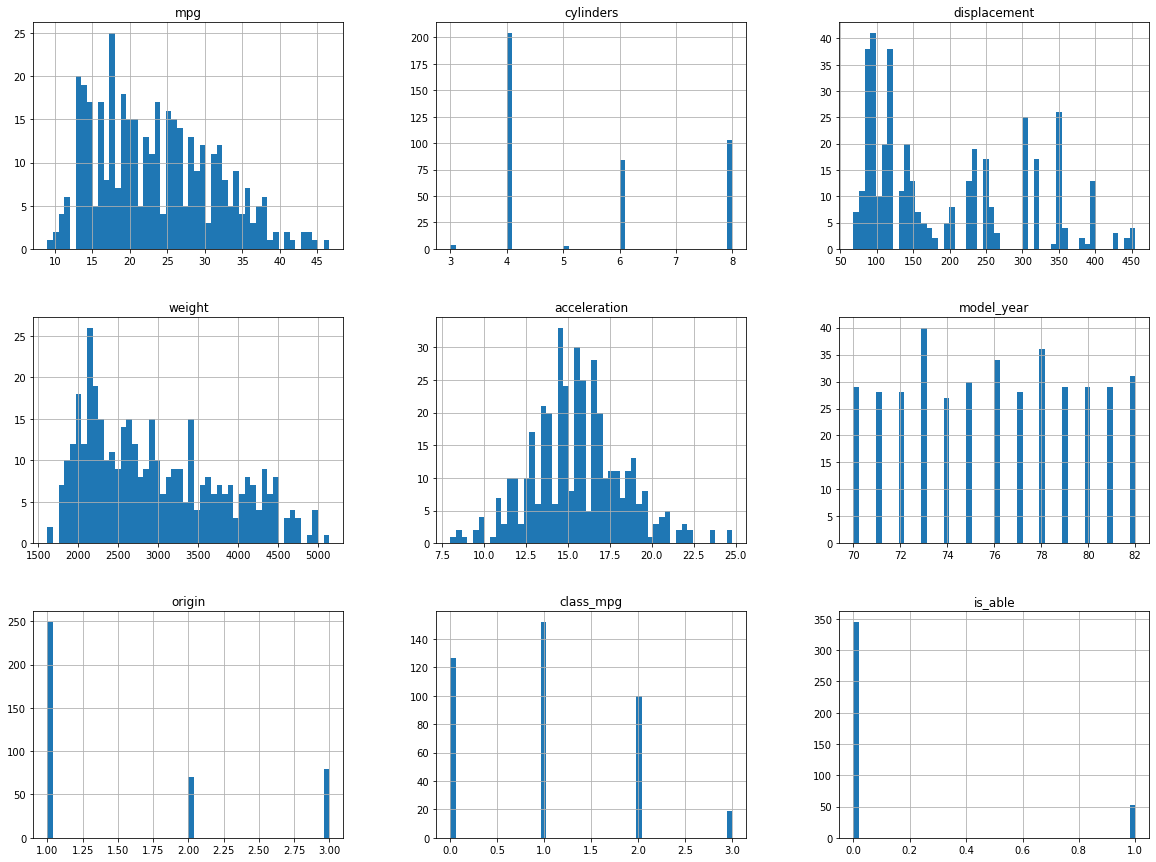

In [7]:
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

Exploring column values

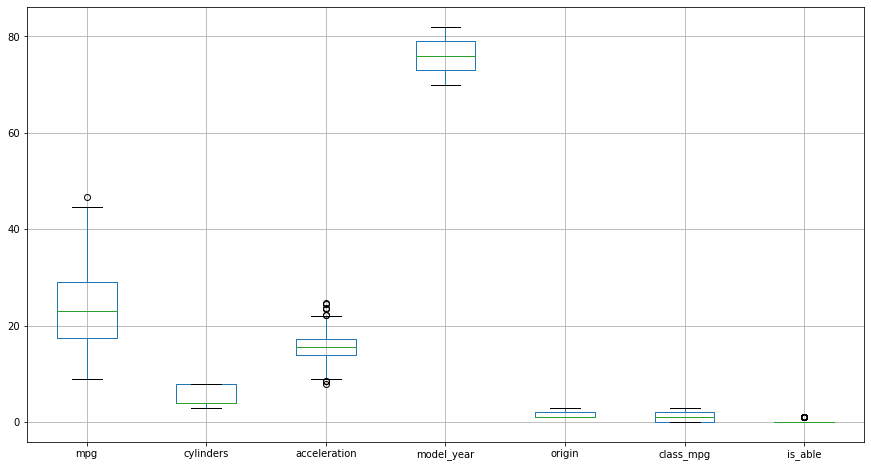

In [17]:
%matplotlib inline
data.drop(['weight','displacement'], axis=1).boxplot(figsize=(15, 8))
plt.show()

I removed *displacement* and *weight* because they have standard deviations of 104.269838 and 846.841774 respectively. They do not contribute information to the box and whiskers plot.

## Change *horsepower* and *car_name* from quantitative to qualitative variable

### *horsepower*

In [6]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
data[data['horsepower']=='?'] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,class_mpg,is_able
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto,1,0
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick,1,0
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe,3,0
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra,1,0
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i,2,0
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl,1,0


In [68]:
#data[data['horsepower']!='?']['horsepower'].unique().astype(int).mean()

In [8]:
data[data['horsepower']=='?'] = int (data[data['horsepower']!='?']['horsepower'].unique().astype('int64', copy=False ).mean() )

In [9]:
data = data.astype({"horsepower": int})

In [10]:
data.horsepower

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
 9   class_mpg     398 non-null    int64  
 10  is_able       398 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 34.3+ KB


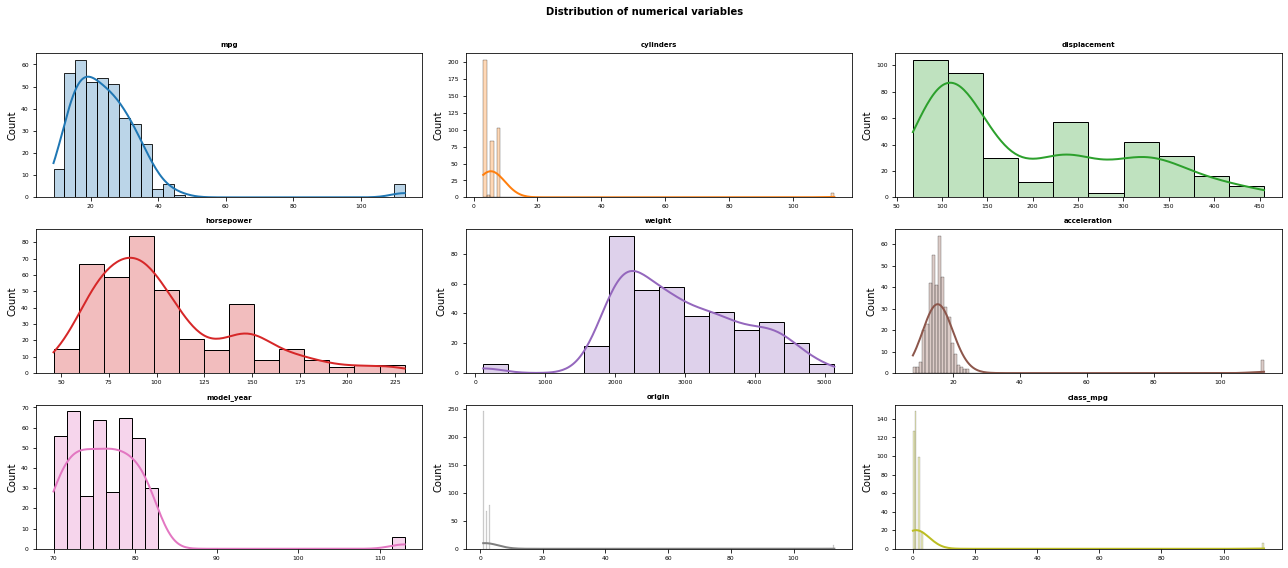

In [81]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 8))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('is_able')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = data,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution of numerical variables', fontsize = 10, fontweight = "bold");

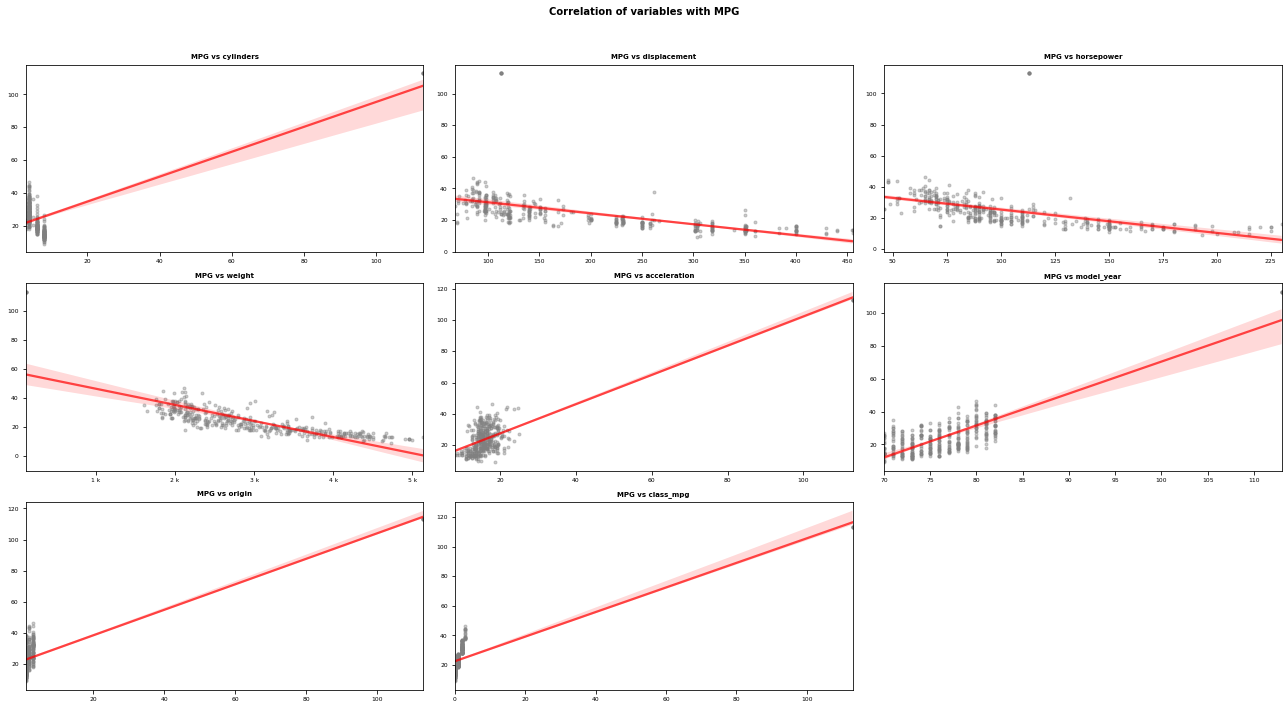

In [93]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('mpg')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = data[colum],
        y           = data['mpg'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"MPG vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation of variables with MPG', fontsize = 10, fontweight = "bold");



Text(0.5, 1.0, 'Correlation matrix Heatmap')

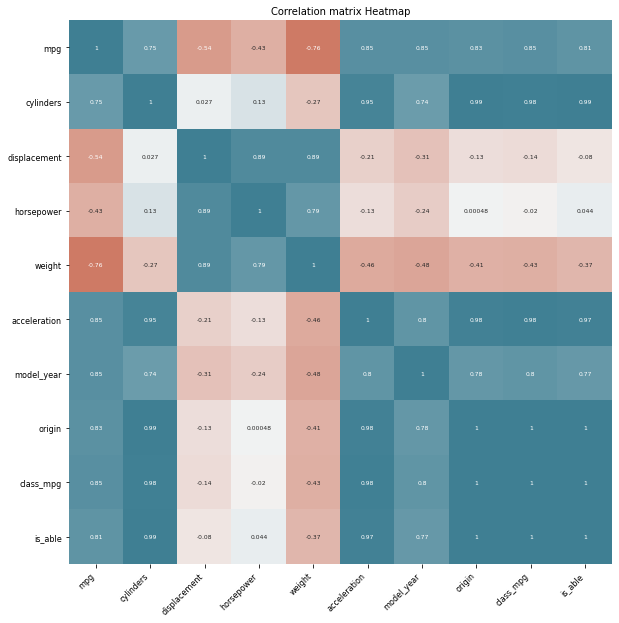

In [95]:
#Correlation matrix Heatmap

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = data.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)
ax.set_title('Correlation matrix Heatmap', fontsize = 10)

### car_name

In [12]:
data.car_name.value_counts()

113                         6
ford pinto                  5
amc matador                 5
toyota corolla              5
amc gremlin                 4
                           ..
volkswagen rabbit custom    1
bmw 320i                    1
oldsmobile starfire sx      1
chrysler newport royal      1
ford fairmont (auto)        1
Name: car_name, Length: 302, dtype: int64

As there are many values, it is feasible to use an encoder

In [13]:
pd.get_dummies(data.car_name)

,113,amc ambassador brougham,amc ambassador dpl,amc ambassador sst,amc concord,amc concord d/l,amc concord dl 6,amc gremlin,amc hornet,amc hornet sportabout (sw),...,volvo 145e (sw),volvo 244dl,volvo 245,volvo 264gl,volvo diesel,vw dasher (diesel),vw pickup,vw rabbit,vw rabbit c (diesel),vw rabbit custom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data = pd.concat([data,pd.get_dummies(data.car_name)],axis=1)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,class_mpg,...,volvo 145e (sw),volvo 244dl,volvo 245,volvo 264gl,volvo diesel,vw dasher (diesel),vw pickup,vw rabbit,vw rabbit c (diesel),vw rabbit custom
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1,...,0,0,0,0,0,0,0,0,0,0
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,3,...,0,0,0,0,0,0,1,0,0,0
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,2,...,0,0,0,0,0,0,0,0,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,2,...,0,0,0,0,0,0,0,0,0,0


In [203]:
#data.car_name, car_names_index = pd.factorize(data.car_name)

# Classifiers

## **Is able?**

In [15]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,class_mpg,...,volvo 145e (sw),volvo 244dl,volvo 245,volvo 264gl,volvo diesel,vw dasher (diesel),vw pickup,vw rabbit,vw rabbit c (diesel),vw rabbit custom
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Columns: 313 entries, mpg to vw rabbit custom
dtypes: float64(3), int64(7), object(1), uint8(302)
memory usage: 151.7+ KB


## Split data

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
                                        data.drop(['is_able','car_name'], axis = 'columns'), #X
                                        data['is_able'], # y
                                        train_size   = 0.8,
                                        random_state = 41,
                                        shuffle      = True
                                    )

In [20]:
X_train.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,class_mpg,113,...,volvo 145e (sw),volvo 244dl,volvo 245,volvo 264gl,volvo diesel,vw dasher (diesel),vw pickup,vw rabbit,vw rabbit c (diesel),vw rabbit custom
252,19.2,6,231.0,105,3535,19.2,78,1,1,0,...,0,0,0,0,0,0,0,0,0,0
181,33.0,4,91.0,53,1795,17.5,75,3,2,0,...,0,0,0,0,0,0,0,0,0,0
331,33.8,4,97.0,67,2145,18.0,80,3,2,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y_train.head(3)

252    0
181    0
331    0
Name: is_able, dtype: int64

In [22]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(318, 311) (318,) (80, 311) (80,)


## *Models*

In [23]:
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

### *Logistic Regression*

In [24]:
log_reg = LogisticRegression(C=10, 
                             class_weight=None,
                             dual=False,
                             fit_intercept=True,
                             intercept_scaling=1, 
                             l1_ratio=None,
                             max_iter=500,   
                             multi_class='multinomial', 
                             n_jobs=-1,
                             penalty='l2',
                             random_state=42,
                             solver='lbfgs',
                             tol=0.000001,
                             verbose=0,
                             warm_start=False)


log_reg.fit(X_train, y_train)
y_predict_lr = log_reg.predict(X_test)

print("Logistic Regression accurracy : {}".format(accuracy_score(y_test, y_predict_lr) ) )

Logistic Regression accurracy : 0.9875


### *Decission Tree Classifer*

In [218]:
tree_clas = DecisionTreeClassifier(ccp_alpha=0.0000001, 
                                   criterion='gini',
                                   max_depth=33,
                                   max_features=9,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   min_impurity_split=None,
                                   min_samples_leaf=1,
                                   min_samples_split=2,
                                   min_weight_fraction_leaf=0.0,
                                   presort='deprecated',
                                   random_state=42, 
                                   splitter='best')


tree_clas.fit(X_train, y_train)
y_predict_dt = tree_clas.predict(X_test)   

print("Decission Tree Classifer accurracy : {}".format(accuracy_score(y_test, y_predict_dt) ) )  

Decission Tree Classifer accurracy : 0.925


### *Decission Random Forest Classifier*

In [219]:
forest_reg = RandomForestClassifier(n_estimators=292,
                                    criterion='gini',
                                    max_depth=32,
                                    min_samples_split=2,
                                    min_samples_leaf=1, 
                                    min_weight_fraction_leaf=0.0, 
                                    max_features=8, 
                                    max_leaf_nodes=None, 
                                    min_impurity_decrease=0.0, 
                                    min_impurity_split=None, 
                                    bootstrap=True, 
                                    oob_score=True, 
                                    n_jobs=-1, 
                                    random_state=42, 
                                    verbose=0, 
                                    warm_start=False, 
                                    class_weight=None, 
                                    ccp_alpha=0.000001, 
                                    max_samples=None, 
                                   )
forest_reg.fit(X_train, y_train)
y_predict_rf = forest_reg.predict(X_test)    

print("Decission Random Forest Classifer accurracy : {}".format(accuracy_score(y_predict_rf, y_test) ) )    

Decission Random Forest Classifer accurracy : 0.975


### *Support Vector Machine*

In [220]:
svm_clf = svm.SVC(C=1.0,
                  break_ties=False,
                  cache_size=800,
                  class_weight=None,
                  coef0=0.0,
                  decision_function_shape='ovr',
                  degree=3, 
                  gamma='scale', 
                  kernel='linear',
                  max_iter=-1, 
                  probability=True,
                  random_state=42,
                  shrinking=True,
                  tol=0.001,
                  verbose=False)

svm_clf.fit(X_train, y_train)
y_predict_svm = svm_clf.predict(X_test)    

print("Support Vector Machine accurracy : {}".format(accuracy_score(y_predict_svm, y_test) ) )    

Support Vector Machine accurracy : 0.975


## AUC ROC

In [186]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [221]:
AUC_log_reg = roc_auc_score(y_test, y_predict_lr)
AUC_tree_clas = roc_auc_score(y_test, y_predict_dt)
AUC_rand_clas = roc_auc_score(y_test, y_predict_rf)
AUC_svm_clas = roc_auc_score(y_test, y_predict_svm)
print(AUC_log_reg,AUC_tree_clas,AUC_rand_clas,AUC_svm_clas)

0.9666666666666667 0.8512820512820514 0.9333333333333333 0.9333333333333333


In [227]:
#Logistic Regresion
y_pred_lr = log_reg.predict_proba(X_test)[:, 1]
fpr_lr_clas, tpr_lr_clas, _ = roc_curve(y_test, y_pred_lr)

#Decission TeeeClassifer
y_pred_dt = tree_clas.predict_proba(X_test)[:,1]
fpr_tree_clas, tpr_tree_clas, _ = roc_curve(y_test, y_pred_dt)

#Decission RandomForestClassifier
y_pred_rf = forest_reg.predict_proba(X_test)[:,1]
fpr_rand_clas, tpr_rand_clas, _ = roc_curve(y_test, y_pred_rf)

#Decission SVM
y_pred_svm_clas = svm_clf.predict_proba(X_test)[:,1]
fpr_svm_clas, tpr_svm_clas, _ = roc_curve(y_test, y_predict_svm)

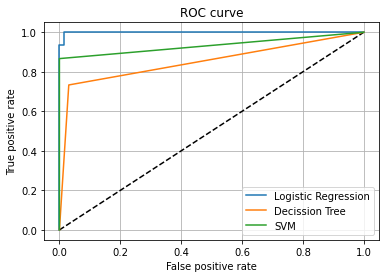

In [245]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_lr_clas, tpr_lr_clas, label='Logistic Regression')
plt.plot(fpr_tree_clas, tpr_tree_clas, label='Decission Tree')
plt.plot(fpr_svm_clas, tpr_svm_clas, label='SVM')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Based on the ROC curves and the AUC index, the Logistic Regression model performed better than the others. Predictions will be based on this model. 
I will make probabilistic predictions because I consider that given the problem, if the consumer is in doubt about any car, he can see in an interval from 0 to 1 how good a choice he may have in mind.

In [32]:
data.iloc[:3, 0:11] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,class_mpg,is_able
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,0


### Probabilistic Predictions

In [27]:
data.car_name.unique

<bound method Series.unique of 0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car_name, Length: 398, dtype: object>

In [316]:
#a = data.loc[data.car_name.str.contains("Ford ranger", na=False,case=False, regex=False)].index

array([ True])

In [47]:
def prediction():
                mpg = 18,
                cylinders = 8, 
                displacement = 307, 
                horsepower = 130, 
                weight = 3504, 
                acceleration = 12, 
                model_year =70, 
                origin = 1, 
                car_name='chevrolet chevelle malibu',
                class_mpg =0,
                index = data.loc[data.car_name.str.contains("chevrolet chevelle malibu", na=False,case=False, regex=False)].index

                new_predict = [0 for _ in range (len(data.columns))]
                len(new_predict)
                #mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, car_name, class_mpg
                new_predict[0:9] = 18, 8, 307, 130, 3504, 12, 70, 1, 2,0 #'chevrolet chevelle malibu'

                for i in index:
                    new_predict[i] = 1
                
                new_predict=list(new_predict)
                for i in range(3):
                    new_predict.pop()
                print(new_predict)
            

                return log_reg.predict_proba([new_predict]) #is able
probabilities = prediction()
print("\nNot able probability:{0}\nAble probability:{1}\nOther option probability:{2}".format(probabilities[0][0], probabilities[0][1],probabilities[0][2]) )

[1, 8, 307, 130, 3504, 12, 70, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Not able probability:1.4886914898567492e-33
Able probabi

## **Car class**

In [48]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,class_mpg,...,volvo 145e (sw),volvo 244dl,volvo 245,volvo 264gl,volvo diesel,vw dasher (diesel),vw pickup,vw rabbit,vw rabbit c (diesel),vw rabbit custom
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Columns: 313 entries, mpg to vw rabbit custom
dtypes: float64(3), int64(7), object(1), uint8(302)
memory usage: 151.7+ KB


In [84]:
data_car_class = data.iloc[:,:11]
data_car_class

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,class_mpg,is_able
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1,0
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,3,0
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,2,0
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,2,0


In [88]:
car_names_index, car_names = pd.factorize(data.car_name)
car_names_index

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  18,  29,  30,  31,  24,  32,   0,  33,  34,   6,
        35,   5,   7,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,   6,   8,   7,
         5,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  34,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  16,  17,  15,  88,   6,
        89,  90,  91,  24,  92,  54,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107,  15,  31,  16, 108, 109,
        95,  47,  54, 110,  34, 111,  77, 112, 113,  64,  62, 114, 115,
       101,  30, 116, 117, 100, 118, 119, 120, 121, 122, 108, 123,  17,
         8, 124, 125,  81, 126, 127,  34, 128, 129, 130, 131, 132,  95,
        24, 133,  30, 115, 116,  95, 134, 135, 102,  20, 136, 10

In [96]:
data_car_names.columns

Index([         'mpg',    'cylinders', 'displacement',   'horsepower',
             'weight', 'acceleration',   'model_year',       'origin',
           'car_name',    'class_mpg',      'is_able',              0],
      dtype='object')

In [97]:
data_car_names = pd.concat([data_car_class,pd.Series(car_names_index)],axis=1)
data_car_names = data_car_names.rename(columns={0:'car_names_encoded'})
#df.rename(columns={"A": "a", "B": "c"})
data_car_names.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,class_mpg,is_able,car_names_encoded
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,0,1
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,0,2


In [89]:
pd.Series(car_names_index)

0        0
1        1
2        2
3        3
4        4
      ... 
393    297
394    298
395    299
396    300
397    301
Length: 398, dtype: int64

## Split data

In [60]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
                                        data_car_names.drop(['car_name'], axis = 'columns'), #X
                                        data_car_names['car_names_encoded'], # y
                                        train_size   = 0.8,
                                        random_state = 42,
                                        shuffle      = True
                                    )

In [100]:
X_train.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,class_mpg,is_able,car_names_encoded
3,16.0,8,304.0,150,3433,12.0,70,1,0,0,3
18,27.0,4,97.0,88,2130,14.5,70,3,1,0,18
376,37.0,4,91.0,68,2025,18.2,82,3,2,0,283


In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 3 to 102
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mpg                318 non-null    float64
 1   cylinders          318 non-null    int64  
 2   displacement       318 non-null    float64
 3   horsepower         318 non-null    int64  
 4   weight             318 non-null    int64  
 5   acceleration       318 non-null    float64
 6   model_year         318 non-null    int64  
 7   origin             318 non-null    int64  
 8   class_mpg          318 non-null    int64  
 9   is_able            318 non-null    int64  
 10  car_names_encoded  318 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 29.8 KB


In [102]:
y_train.head(3)

3        3
18      18
376    283
Name: car_names_encoded, dtype: int64

In [103]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(318, 11) (318,) (80, 11) (80,)


## *Models*

In [104]:
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

### *Logistic Regression*

In [115]:
log_reg = LogisticRegression(C=50, 
                             class_weight=None,
                             dual=False,
                             fit_intercept=True,
                             intercept_scaling=1, 
                             l1_ratio=None,
                             max_iter=500,   
                             multi_class='multinomial', 
                             n_jobs=-1,
                             penalty='l2',
                             random_state=42,
                             solver='lbfgs',
                             tol=0.000001,
                             verbose=0,
                             warm_start=False)


log_reg.fit(X_train, y_train)
y_predict_lr = log_reg.predict(X_test)

print("Logistic Regression accurracy : {}".format(accuracy_score(y_test, y_predict_lr) ) )

Logistic Regression accurracy : 0.075


### *Decission Tree Classifer*

In [123]:
tree_clas = DecisionTreeClassifier(ccp_alpha=0.0000001, 
                                   criterion='gini',
                                   max_depth=50,
                                   max_features=10,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   min_impurity_split=None,
                                   min_samples_leaf=1,
                                   min_samples_split=2,
                                   min_weight_fraction_leaf=0.0,
                                   presort='deprecated',
                                   random_state=42, 
                                   splitter='best')


tree_clas.fit(X_train, y_train)
y_predict_dt = tree_clas.predict(X_test)   

print("Decission Tree Classifer accurracy : {}".format(accuracy_score(y_test, y_predict_dt) ) )  

Decission Tree Classifer accurracy : 0.15


### *Decission Random Forest Classifier*

In [124]:
forest_reg = RandomForestClassifier(n_estimators=292,
                                    criterion='gini',
                                    max_depth=32,
                                    min_samples_split=2,
                                    min_samples_leaf=1, 
                                    min_weight_fraction_leaf=0.0, 
                                    max_features=8, 
                                    max_leaf_nodes=None, 
                                    min_impurity_decrease=0.0, 
                                    min_impurity_split=None, 
                                    bootstrap=True, 
                                    oob_score=True, 
                                    n_jobs=-1, 
                                    random_state=42, 
                                    verbose=0, 
                                    warm_start=False, 
                                    class_weight=None, 
                                    ccp_alpha=0.000001, 
                                    max_samples=None, 
                                   )
forest_reg.fit(X_train, y_train)
y_predict_rf = forest_reg.predict(X_test)    

print("Decission Random Forest Classifer accurracy : {}".format(accuracy_score(y_predict_rf, y_test) ) )    

Decission Random Forest Classifer accurracy : 0.125


### *Support Vector Machine*

In [108]:
svm_clf = svm.SVC(C=1.0,
                  break_ties=False,
                  cache_size=800,
                  class_weight=None,
                  coef0=0.0,
                  decision_function_shape='ovr',
                  degree=3, 
                  gamma='scale', 
                  kernel='linear',
                  max_iter=-1, 
                  probability=True,
                  random_state=42,
                  shrinking=True,
                  tol=0.001,
                  verbose=False)

svm_clf.fit(X_train, y_train)
y_predict_svm = svm_clf.predict(X_test)    

print("Support Vector Machine accurracy : {}".format(accuracy_score(y_predict_svm, y_test) ) )    

Support Vector Machine accurracy : 0.0875
